<a href="https://colab.research.google.com/github/NIRUPAMATS/-Machine-Learning-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [8]:
house_price_dataset=sklearn.datasets.fetch_california_housing()

In [ ]:
print(house_price_dataset)

In [11]:
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [13]:
# add the target (price) column to the DataFrame
house_price_dataframe['price']=house_price_dataset.target

In [14]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
house_price_dataframe.shape

(20640, 9)

In [16]:
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [17]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features in the dataset
1. Positive Correlation
2. Negative Correlation



In [18]:
correlation=house_price_dataframe.corr()

<AxesSubplot:>

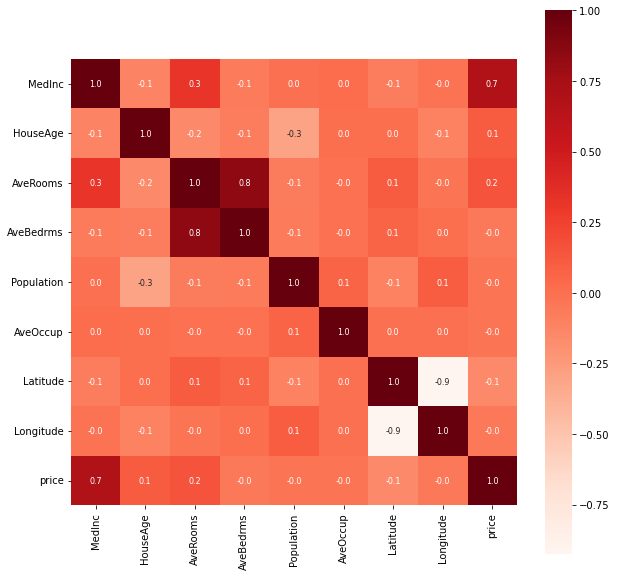

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [25]:
#Splitting the data and Target
X=house_price_dataframe.drop(['price'],axis=1)
Y=house_price_dataframe['price']

In [ ]:
print(X)
print(Y)

In [27]:
#Splitting the data into Training data and Test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training:XGBoost Regressor

In [30]:
model=XGBRegressor()


In [31]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation:



Prediction on training data

In [32]:
# accuracy for prediction on training data
training_data_prediction=model.predict(X_train)

In [33]:
print(training_data_prediction)

[0.6893792  2.986824   0.48874274 ... 1.8632544  1.7800125  0.7565893 ]


In [35]:
# R squared error
score_1=metrics.r2_score(Y_train,training_data_prediction)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9451221492760822
Mean Absolute Error :  0.1919170860794262


Visualizing the actual Prices and predicted prices

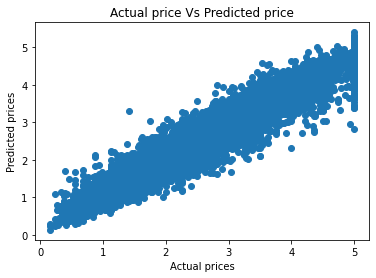

In [38]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual price Vs Predicted price")
plt.show()

Prediction on Test Data

In [36]:
test_data_prediction=model.predict(X_test)

In [37]:
# R squared error
score_1=metrics.r2_score(Y_test,test_data_prediction)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8412904408180302
Mean Absolute Error :  0.30753655785801337
